# Red Neuronal para Clasificación no Lineal

In [286]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Cree los datos de entrada y salida para una compuerta XOR:

In [287]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0,1,1,0])

Para una red neuronal con dos neuronas en la capa de entrada, tres en la capa escondidad y una en la salida, inicialize los pesos y sesgos:

In [288]:
# Inicialización de los pesos y sesgos
w1 = 2 * np.random.randn(2, 3)  # Pesos de la capa de entrada a capa intermedia
w2 = 2 * np.random.randn(3, 1)  # Pesos de la capa intermedia a capa de salida
b1 = np.zeros((1, 3)) + 1   # Sesgos capa intermedia
b2 = np.zeros((1, 1)) + 1   # Sesgo capa de salida


Defina la función de activación y su derivada:

In [289]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-(x)))

def dsigmoid(y):
    return sigmoid(y)*(1 - sigmoid(y))

## Forward pass

In [290]:

Neth = np.dot(x, w1) + b1  # Salida capa intermedia
Outh = sigmoid(Neth)
NetO = np.dot(Outh, w2) + b2  # Salida capa de salida
OutO = sigmoid(NetO)

## Backward pass

Implemente las derivadas del error respecto a los parámetros w y b:

In [291]:
# Cálculo del error
error = y.reshape(-1, 1) - np.apply_along_axis(lambda x: [1] if x > 0.5 else [0] , 1, OutO)

d_salida = error * dsigmoid(OutO)
d_oculta = np.dot(d_salida, w2.T) * dsigmoid(Outh)

Implemente la correción de los parámetros:

In [292]:

lr = 0.1 # factor de aprendizaje

# Actualización de pesos y sesgos
w2 += lr * np.dot(Outh.T, d_salida)
b2 += lr * np.sum(d_salida, axis=0, keepdims=True)
w1 += lr * np.dot(x.T, d_oculta)
b1 += lr * np.sum(d_oculta, axis=0, keepdims=True)

## Entrenamiento de la red neuronal

Use el esquema de "Retropropagación" para entrenar la red.

In [293]:
# Implementación de la retropropagación

epocas = 50000
x_epoca = []
y_error = []

for epoca in range(epocas):
    # Feedforward
    Outh = sigmoid(np.dot(x, w1) + b1)  # Salida capa intermedia
    OutO = sigmoid(np.dot(Outh, w2) + b2)  # Salida capa de salida

    error = y.reshape(-1, 1) - OutO
    #np.apply_along_axis(lambda x: [1] if x > 0.5 else [0] , 1, OutO)

    if epoca % 100 == 0:
        e = np.mean(np.abs(error))
        #print("Iteración:", epoca, "Error:", e)
        x_epoca.append(epoca)
        y_error.append(e)

    d_salida = error * dsigmoid(OutO)
    d_oculta = np.dot(d_salida, w2.T) * dsigmoid(Outh)

    w2 += lr * np.dot(Outh.T, d_salida)
    b2 += lr * np.sum(d_salida, axis=0, keepdims=True)
    w1 += lr * np.dot(x.T, d_oculta)
    b1 += lr * np.sum(d_oculta, axis=0, keepdims=True)

    if e < 0.01:
     break



Valide del entrenamiento. Con una gráfica del error en funcion de las épocas.

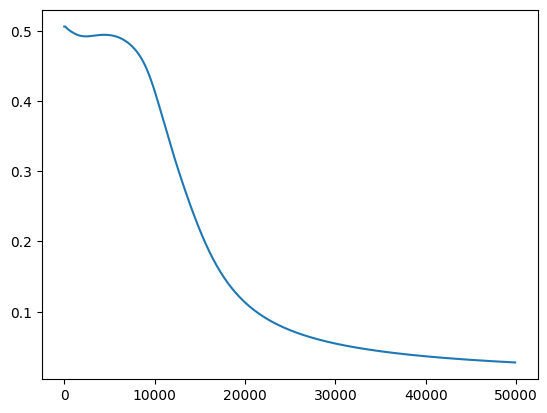

Salida de la red neuronal:
[0.02667102 0.96905737 0.96928731 0.02225857]
salida por hiviside:
[0 1 1 0]


In [294]:
# Gráfica Error vs. Épocas
plt.plot(x_epoca,y_error)
plt.show()

test_input = x
hidden_layer_output = sigmoid(np.dot(test_input, w1) + b1)
predicted_output = sigmoid(np.dot(hidden_layer_output, w2) + b2)

print("Salida de la red neuronal:")
print(predicted_output.flatten())
print("salida por hiviside:")
print(np.apply_along_axis(lambda x: 1 if x > 0.5 else 0 , 1, predicted_output))